In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import os
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [2]:
cd desktop

C:\Users\hp\desktop


In [3]:
cd New folder (3)

C:\Users\hp\desktop\New folder (3)


# UNIVARIATE ANALYSIS

###### on running user_logs file of 29 gb alone my laptop get crash out so i only use v2 files for all the data given to balance the data.######

In [14]:
train_v1 = pd.read_csv('train_v2.csv')
print(train_v1.columns)

Index(['msno', 'is_churn'], dtype='object')


In [5]:
train_v1.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [6]:
train_v1.isnull().sum()

msno        0
is_churn    0
dtype: int64

Text(0,0.5,'count')

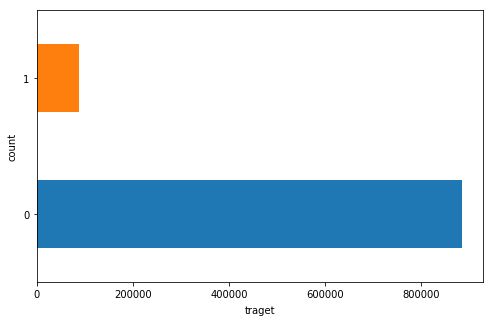

In [7]:
train_v1['is_churn'].value_counts().plot(kind = 'barh' , figsize = (8,5))
plt.xlabel("traget",labelpad=6)
plt.ylabel("count",labelpad=6)

In [10]:
100*train_v1['is_churn'].value_counts()/len(train_v1['is_churn'])
#this shows we have highly imbalanced data 

0    93.607713
1     6.392287
Name: is_churn, dtype: float64

In [20]:
train_v1['is_churn'].value_counts()
#value counts in which we see data is inbalanced

0    929460
1     63471
Name: is_churn, dtype: int64

In [4]:
members_v1 = pd.read_csv('members_v3.csv',parse_dates=['registration_init_time'])

In [5]:
members_v1.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09-15


In [6]:
members_v1.dtypes
#checking the datatypes of the dataset 

msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
dtype: object

In [8]:
members_v1.describe().apply(lambda s : s.apply (lambda x : format (x,'f')))
#used describe to get statistical knowledge of the dataframe

,city,bd,registered_via
count,6769473.000000,6769473.000000,6769473.000000
mean,3.847358,9.795794,5.253069
std,5.478359,17.925900,2.361398
min,1.000000,-7168.000000,-1.000000
25%,1.000000,0.000000,4.000000
50%,1.000000,0.000000,4.000000
75%,4.000000,21.000000,7.000000
max,22.000000,2016.000000,19.000000


In [18]:
members_v1.isnull().sum()
#checking which column has how many null values
#gender can be neglected as their is high ratio of missing values

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

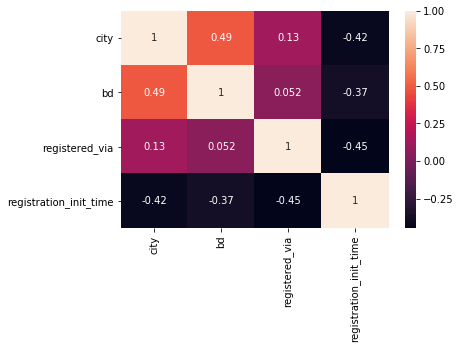

In [58]:
correlation = members_v1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,annot =True)
#correlation between all columns

In [19]:
members_v1['gender'].value_counts().head()
#we see male and females are almost equal which is good

male      1195355
female    1144613
Name: gender, dtype: int64

In [47]:
members_v1['bd'].value_counts().head()

0     4540215
22     112200
21     110574
20     110452
27     102769
Name: bd, dtype: int64

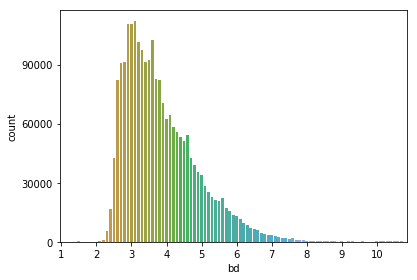

In [57]:
plt.subplot(111)
sns.countplot(members_v1['bd'][members_v1['bd']>0][ members_v1['bd']<100])  
plt.tight_layout()
plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,120000,30000))
plt.show()
#as we see their is a peak in bd graph so young users are more than old once

In [11]:
members_v1['city'].value_counts().head()
#to get insight of city ,which h city has most subscribers 

1     4804326
5      385069
13     320978
4      246848
22     210407
Name: city, dtype: int64

In [53]:
members_v1['registered_via'].value_counts().head()
#checking old subscribers accoding to their start subscriber time so that we can correlate it with such as auto renew option .

4     2793213
3     1643208
9     1482863
7      805895
11      25047
Name: registered_via, dtype: int64

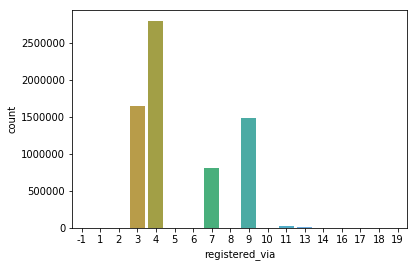

In [56]:
plt.subplot(111)
sns.countplot(members_v1['registered_via'])

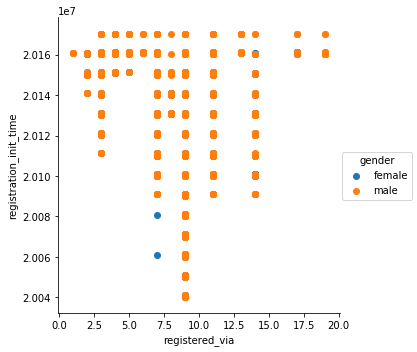

In [44]:
sns.FacetGrid(members_v1,hue="gender",size =5).map(plt.scatter,"registered_via","registration_init_time").add_legend();
plt.show()
#seeing male dominance in this gender graph acc. to registration time

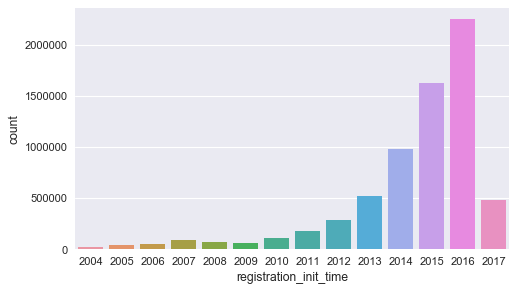

In [9]:
figure(num=None, figsize=(7,4), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(members_v1['registration_init_time'].dt.year)
#this shows registration increases  with time which is good for business

In [7]:
transactions_v1 = pd.read_csv('transactions_v2.csv',parse_dates=['transaction_date','membership_expire_date'])
transactions_v1.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,2017-01-31,2017-05-04,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,2015-08-09,2019-04-12,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,2017-03-03,2017-04-22,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,2017-03-29,2017-03-31,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,2017-03-23,2017-04-23,0


In [9]:
transactions_v1.describe().apply(lambda s : s.apply (lambda x : format (x,'f')))
#used describe to get statistical knowledge of the dataframe

,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel
count,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000,1431009.000000
mean,37.918355,66.017696,281.787035,281.317241,0.785303,0.024551
std,4.964805,102.486396,435.186138,435.419950,0.410612,0.154753
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,30.000000,99.000000,99.000000,1.000000,0.000000
50%,40.000000,30.000000,149.000000,149.000000,1.000000,0.000000
75%,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000
max,41.000000,450.000000,2000.000000,2000.000000,1.000000,1.000000


In [25]:
transactions_v1.isnull().sum()
#checking all null values in the transaction file

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

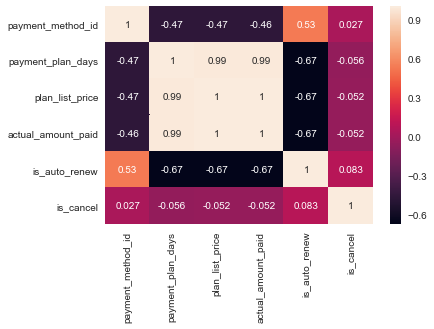

In [17]:
correlation2 = transactions_v1.corr()
sns.heatmap(correlation2,xticklabels=correlation2.columns,annot =True)
#correlation between all columns

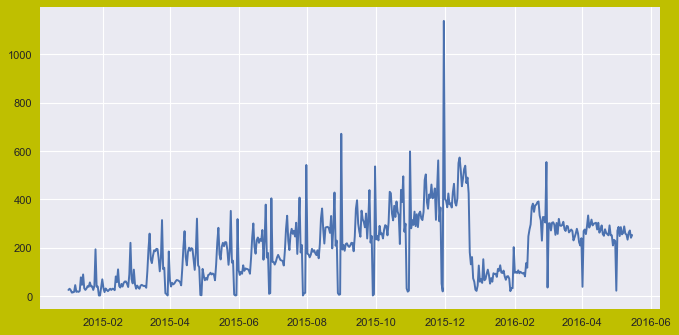

In [29]:
figure(num=None, figsize=(10, 5), dpi=80, facecolor='y', edgecolor='k')
plt.plot(transactions_v1['transaction_date'].value_counts().sort_index()[:500])
#There is a pattern that is repeating and it is increasing with year growth shows increase in the business of company


In [27]:
transactions_v1['payment_method_id'].value_counts().head()
#making some sense, whose particular id have auto renew and also by which id less want to is_cancel their plan

41    696696
39    137120
38    115875
32    100982
36     90844
Name: payment_method_id, dtype: int64

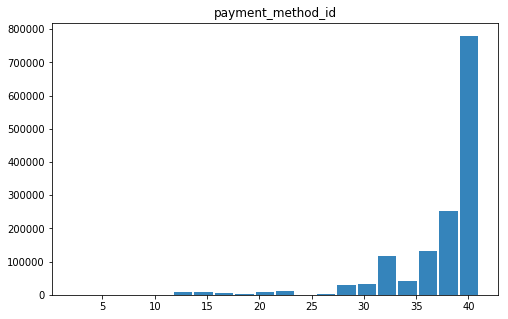

In [73]:
transactions_v1[['payment_method_id']].hist(bins=20,figsize=(8,5),alpha=0.9,grid= False,rwidth=0.9)
plt.show()
#payment id ranges from 2-41 in which 41 being the most favourable method of all

In [28]:
transactions_v1.groupby('plan_list_price').is_auto_renew.value_counts().head()
#correlation bewtween price list and auto renew

plan_list_price  is_auto_renew
0                0                16243
                 1                 2170
1                0                   25
15               0                    1
30               0                    1
Name: is_auto_renew, dtype: int64

In [8]:
transactions_v1['payment_plan_days'].value_counts().head()
#checking the plan days of each user 

30     18956290
0        870124
31       766608
7        577639
195      110234
Name: payment_plan_days, dtype: int64

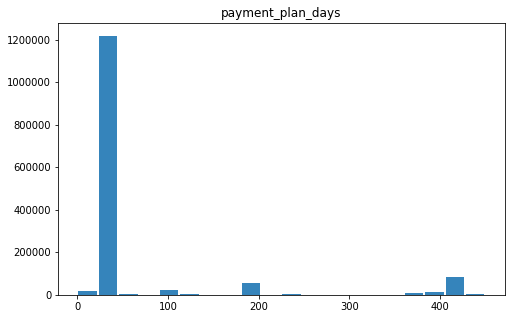

In [72]:
transactions_v1[['payment_plan_days']].hist(bins=20,figsize=(8,5),alpha=0.9,grid= False,rwidth=0.9)
plt.show()
#payment plan days have a very wide range of 450 but most of the users prefer 30 day plan

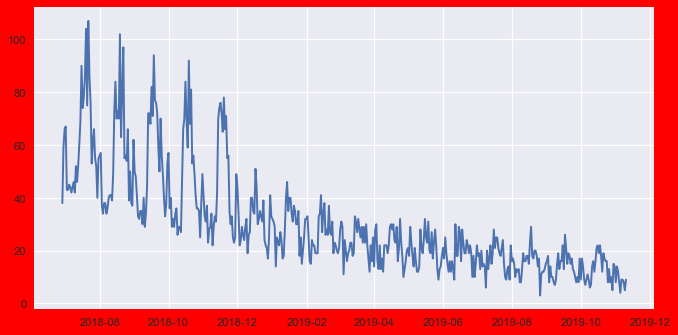

In [25]:
figure(num=None, figsize=(10, 5), dpi=80, facecolor='r', edgecolor='y')
plt.plot(transactions_v1['membership_expire_date'].value_counts().sort_index()[500:1000])
#Here We can se there is a pattern on monthly basis that is repeating itself and its increasing with time

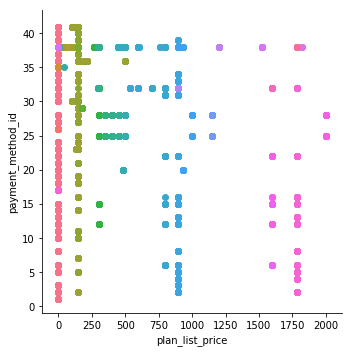

In [15]:
sns.FacetGrid(transactions_v1,hue="payment_plan_days",size =5).map(plt.scatter,"plan_list_price","payment_method_id");
plt.show()
#here we can see small plan are most popular in some i'd like 36

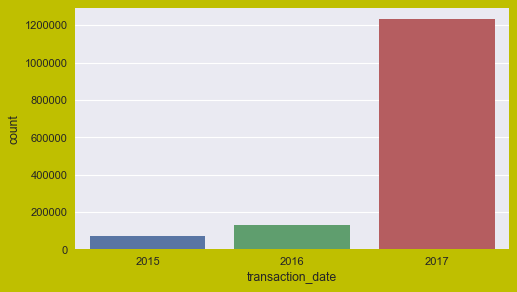

In [12]:
figure(num=None, figsize=(7,4), dpi=80, facecolor='y', edgecolor='b')
sns.countplot(transactions_v1['transaction_date'].dt.year)
#this is due to we have givem more data of 2017

In [10]:
user_logs_v1 = pd.read_csv('user_logs_v2.csv')
user_logs_v1.head()


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [11]:
user_logs_v1.describe().apply(lambda s : s.apply (lambda x : format (x,'f')))
#used describe to get statistical knowledge of the dataframe

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000,18396362.000000
mean,20170316.085613,6.191401,1.508789,0.941376,1.079905,30.282461,29.036146,7904.813556
std,8.916720,13.428266,3.908539,1.924840,3.518409,42.036412,32.198660,10136.323015
min,20170301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.001000
25%,20170308.000000,0.000000,0.000000,0.000000,0.000000,7.000000,8.000000,1959.944000
50%,20170316.000000,2.000000,1.000000,0.000000,0.000000,17.000000,18.000000,4582.990000
75%,20170324.000000,7.000000,2.000000,1.000000,1.000000,37.000000,38.000000,9848.441000
max,20170331.000000,5639.000000,912.000000,508.000000,1561.000000,41107.000000,4925.000000,9194058.522000


In [8]:
user_logs_v1.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

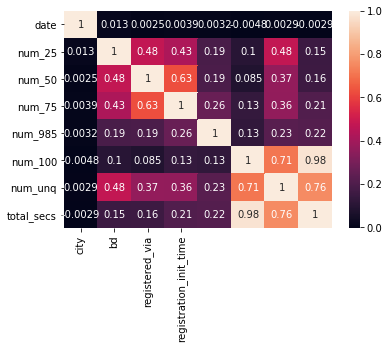

In [74]:
correlation3 = user_logs_v1.corr()
sns.heatmap(correlation3,xticklabels=correlation.columns,annot =True)
#correlation between all columns to check dependence

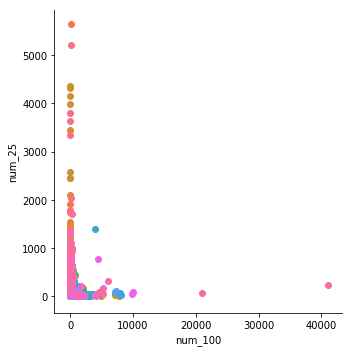

In [14]:
sns.FacetGrid(user_logs_v1,hue="num_unq",size =5).map(plt.scatter,"num_100","num_25");
plt.show()
#this shows graph between 25 percent listened song and 100 percent listening

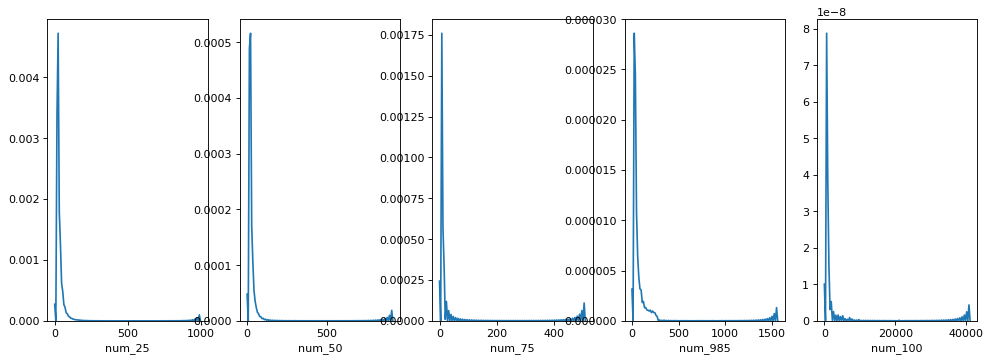

In [79]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(151)
sns.distplot(user_logs_v1['num_25'][user_logs_v1['num_25']<1000],hist=False)
plt.subplot(152)
sns.distplot(user_logs_v1['num_50'],hist=False)
plt.subplot(153)
sns.distplot(user_logs_v1['num_75'],hist=False)
plt.subplot(154)
sns.distplot(user_logs_v1['num_985'],hist=False)
plt.subplot(155)
sns.distplot(user_logs_v1['num_100'],hist=False)
#This pattern is very obvious and common most of the people listen some songs
#there is minima in between all 5 graph and then a rise at last

# BI-VARIATE AND MULTIVARIATE ANALYSIS

In [17]:
train_members = pd.merge(train_v1, members_v1, on='msno')
train_members.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5,28,male,3,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13,20,male,3,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13,18,male,3,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1,0,NaN,7,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13,35,female,7,2014-01-25


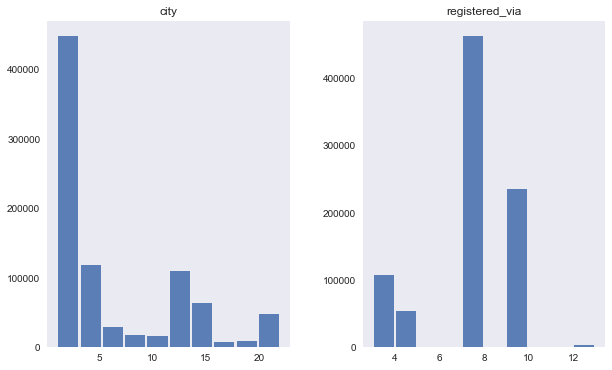

In [35]:
train_members[['city','registered_via']].hist(bins=10,figsize=(10,6),alpha=0.9,grid= False,rwidth=0.9)
plt.show()

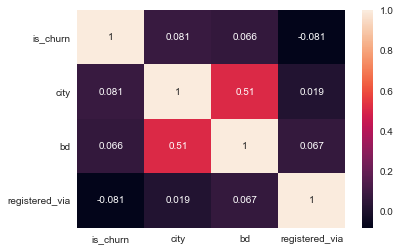

In [34]:
correlation1 = train_members.corr()
sns.heatmap(correlation1,xticklabels=correlation1.columns,annot =True)
#correlation between all columns

In [18]:
train_transactions = pd.merge(train_v1, transactions_v1, on='msno')
train_transactions.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36,30,180,180,0,2017-03-11,2017-04-11,0
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,17,60,0,0,0,2017-03-11,2017-03-14,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,15,90,300,300,0,2017-03-14,2017-06-15,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41,30,149,149,1,2015-09-08,2017-06-08,0
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41,30,149,149,1,2015-09-08,2017-07-08,0


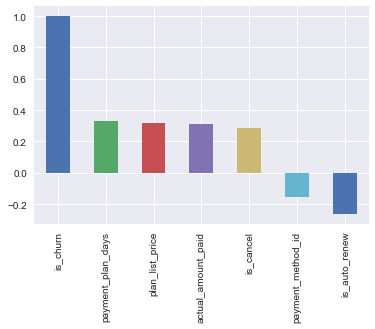

In [38]:
train_transactions.corr()['is_churn'].sort_values(ascending=False).plot(kind = 'bar')

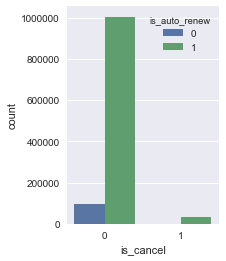

In [39]:
plt.subplot(1,2,1)
sns.countplot('is_cancel',hue = 'is_auto_renew',data = train_transactions)
#this means no auto renew person has churn

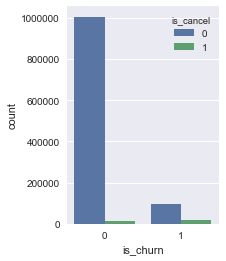

In [40]:
plt.subplot(1,2,1)
sns.countplot('is_churn',hue = 'is_cancel',data = train_transactions)

In [41]:
train_transactions.groupby('payment_method_id').is_churn.value_counts().head()
#this give clear info of which payment method types have churn or not churn

payment_method_id  is_churn
3                  1            9
6                  1            5
8                  1            9
                   0            1
10                 0           34
Name: is_churn, dtype: int64

is_cancel             0    1
payment_method_id           
3                   9.0  0.0
6                   5.0  0.0
8                  10.0  0.0
10                 39.0  1.0
11                 76.0  3.0


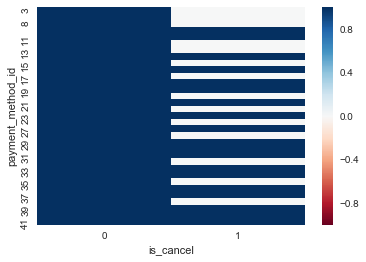

In [42]:
data_1= train_transactions.groupby('payment_method_id').is_cancel.value_counts().unstack().fillna(0)
print(data_1.head())
#this shows which id's have mostly cancel their plan
sns.heatmap((data_1),cmap='RdBu',vmin=-1,vmax=1);

is_cancel              0        1
is_auto_renew                    
0                94750.0      0.0
1              1004403.0  32883.0


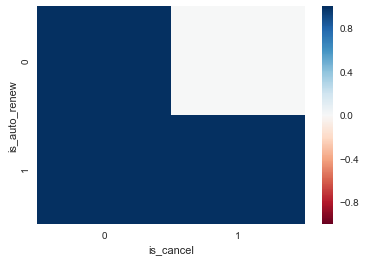

In [44]:
data = train_transactions.groupby('is_auto_renew').is_cancel.value_counts().unstack().fillna(0)
print(data)
sns.heatmap((data),cmap='RdBu',vmin=-1,vmax=1);

#this shows no one ha cancel with auto renew 

In [19]:
train_members_transactions = pd.merge(train_transactions, train_members, on='msno')
train_members_transactions.head()

,msno,is_churn_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn_y,city,bd,gender,registered_via,registration_init_time
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,36,30,180,180,0,2017-03-11,2017-04-11,0,1,13,20,male,3,2013-12-23
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,17,60,0,0,0,2017-03-11,2017-03-14,0,1,13,18,male,3,2013-12-27
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,15,90,300,300,0,2017-03-14,2017-06-15,0,1,13,18,male,3,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41,30,149,149,1,2015-09-08,2017-06-08,0,1,1,0,NaN,7,2014-01-09
4,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,41,30,149,149,1,2015-09-08,2017-07-08,0,1,1,0,NaN,7,2014-01-09


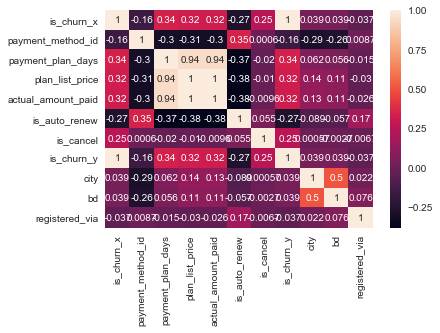

In [20]:
correlation4 = train_members_transactions.corr()
sns.heatmap(correlation4,xticklabels=correlation4.columns,annot =True)